In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 设置图像的显示位置，设置图像现在在当前的文档中
%matplotlib inline

# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # mac
plt.rcParams['font.sans-serif'] = 'SimHei'  # window
plt.rcParams['axes.unicode_minus'] = False  # 设置负号


%config InlineBackend.figure_format = 'svg' #矢量图设置

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
#引入数据
douyin = pd.read_csv("./douyin.csv")

In [7]:
douyin.head()

,name,gender,country,province,city,location,category,fans,videos,likes,comments,shares,following,school,custom_verify,enterprise_verify,signature
0,人民日报,0,中国,北京,北京,北京,政企,117259000,2427,1165446000,11906782048,9089061412,18,NaN,NaN,人民日报官方账号,参与、沟通、记录时代。
1,央视新闻,0,中国,北京,北京,北京,政企,105648000,3681,3814571666,2603872833,1989050522,27,NaN,央视新闻官方账号,央视新闻官方抖音号,本宝宝暂时还没想到个性签名
2,陈赫,1,中国,NaN,上海,上海,明星,68374000,422,570096000,430908721,117639297,131,上海戏剧学院,演员陈赫,NaN,😎帅到没朋友 💁🏻‍♂️有东西直播间 🔜1⃣️1⃣️1⃣️8⃣️🕔 ☑️公众号➰[陈赫]
3,Dear-迪丽热巴,0,NaN,NaN,NaN,NaN,明星,49790000,29,181167000,202448645,151645265,0,NaN,演员,NaN,NaN
4,毒舌电影,1,中国,广东,广州,广州,剧情,46355000,616,820393000,28026109,13005392,24,NaN,优质影视自媒体、抖音影评团成员,NaN,看电影， 可以改变人生。 商务邮：dsmovie@youhaoxi.cn ❤️ 日历预售...


### 查看大V账户的男女比例 

In [8]:
res=douyin['gender'].value_counts()[:2]
res=res.tolist()
res

[2592, 2094]

In [9]:
data1=[['男',res[0]],['女',res[1]]]

In [10]:
from pyecharts.faker import Faker
[list(z) for z in zip (Faker.choose(),Faker.values())]

[['周一', 59],
 ['周二', 124],
 ['周三', 87],
 ['周四', 22],
 ['周五', 137],
 ['周六', 41],
 ['周日', 81]]

In [11]:
from pyecharts import options as opts
from pyecharts.charts import Pie


(
    Pie()
    .add("",data1,
        radius=["40%", "55%"],
        label_opts=opts.LabelOpts(
            position="outside",
            formatter="{a|{a}}{abg|}\n{hr|}\n {b|{b}: }{c}  {per|{d}%}  ",
            background_color="#eee",
            border_color="#aaa",
            border_width=1,
            border_radius=4,
            rich={
                "a": {"color": "#999", "lineHeight": 22, "align": "center"},
                "abg": {
                    "backgroundColor": "#e3e3e3",
                    "width": "100%",
                    "align": "right",
                    "height": 22,
                    "borderRadius": [4, 4, 0, 0],
                },
                "hr": {
                    "borderColor": "#aaa",
                    "width": "100%",
                    "borderWidth": 0.5,
                    "height": 0,
                },
                "b": {"fontSize": 16, "lineHeight": 33},
                "per": {
                    "color": "#eee",
                    "backgroundColor": "#334455",
                    "padding": [2, 4],
                    "borderRadius": 2,
                },
            },
        ),
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="大v的男女比例"))
    .render_notebook()
)

###  看国外的主要网红来源有哪些国家

In [12]:
douyin['country'].unique()

array(['中国', nan, 'Hong Kong', '暂不设置', '阿尔及利亚', '奥地利', '百慕大', '美国',
       '阿拉伯联合酋长国', '尼泊尔', '爱沙尼亚', '斯里兰卡', '英国', '埃塞俄比亚', '韩国', '大韩民国',
       '埃及', '法国', '阿尔巴尼亚', '澳大利亚', 'China', '安道尔', '瑞士', '日本', '泰国',
       '爱尔兰', '俄罗斯', 'United States', '加拿大', '巴巴多斯岛', '汤加', '阿鲁巴', '西班牙',
       '挪威', '冰岛', '阿曼', '约旦', '安哥拉', '玻利维亚', '巴哈马', '香港', '苏丹', '直布罗陀'],
      dtype=object)

In [13]:
dic={
    'China':'中国',
    'Hong Kong':'香港',
    '大韩民国':'韩国',
    'United States':'美国',
}

In [14]:
douyin['country']=douyin['country'].replace(dic)

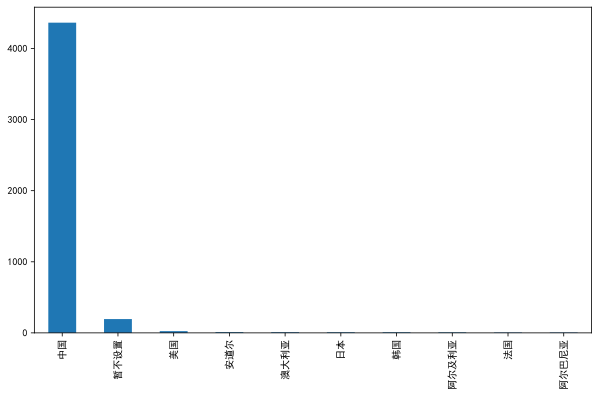

In [15]:
res = douyin['country'].value_counts()
res[:10].plot.bar(figsize=(10,6))
plt.show()

### 看国内的网红主要分布的省份、城市

In [16]:
douyin.columns

Index(['name', 'gender', 'country', 'province', 'city', 'location', 'category',
       'fans', 'videos', 'likes', 'comments', 'shares', 'following', 'school',
       'custom_verify', 'enterprise_verify', 'signature'],
      dtype='object')

In [17]:
res=douyin[douyin['country']=='中国']
res['province'].unique()

array(['北京', nan, '广东', '云南', '上海', '江苏', '吉林', '湖南省', '四川', '黑龙江', '安徽',
       '山东', '浙江', '贵州', '湖南', '浙江省', '辽宁', '新疆', '四川省', '江西', '山东省',
       '重庆', '湖北', '河南', '福建', '广西', '山西', '湖北省', '陕西', '天津', '江苏省',
       '广东省', '河北', '黑龙江省', '河南省', '青海', '海南', '广西壮族自治区', '福建省', '辽宁省',
       '安徽省', '河北省', '内蒙古', '台湾', '云南省', '甘肃', '江西省', '贵州省', '新疆维吾尔自治区',
       'Sichuan', '青海省', '海南省', '陕西省', '吉林省', '山西省', '香港', '内蒙古自治区',
       'Jilin', '宁夏', 'Hubei', '甘肃省', 'Guangdong', 'Shaanxi'],
      dtype=object)

In [18]:
dic={
    '新疆维吾尔自治区':'新疆',
    'Sichuan':'四川',
    'Jilin':'湖北',
    'Guangdong':'广东',
    'Shaanxi':'陕西',
    '内蒙古自治区':'内蒙古',
    '广西壮族自治区':'广西'
}

In [19]:
douyin['province'].replace(dic,inplace=True)

In [20]:
douyin['province'] = douyin['province'].str.rstrip("省")

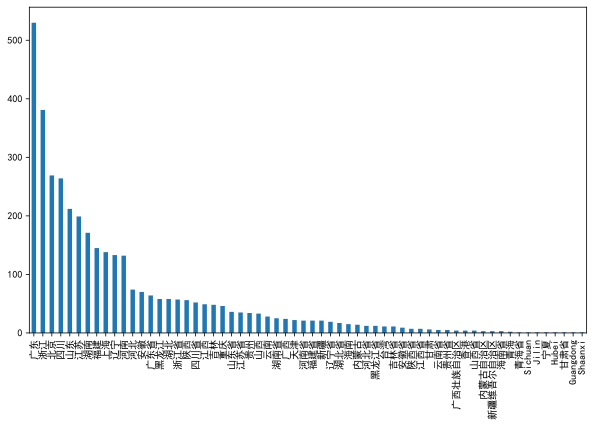

In [21]:
res['province'].value_counts().plot.bar(figsize=(10,6))
plt.show()

In [22]:
res['city'].unique()

array(['北京', '上海', '广州', '昆明', '苏州', '延边', '岳阳市', '绵阳', '哈尔滨', '六安',
       '重庆市', '威海', '杭州', '贵阳', '南京', '邵阳', '杭州市', '鞍山', '乌鲁木齐', '天津',
       '成都市', '沈阳', '金华', '萍乡', '成都', '韶关', '北京市', '徐州', '长沙', '青岛',
       '上海市', '深圳', '青岛市', '重庆', '武汉', '郑州', '天津市', '厦门', '贺州', '太原',
       '自贡', '武汉市', '黑河', '四平', '芜湖', '西安', '福州', '镇江', '安阳', '常州市', '长春',
       '广州市', '阿坝', '潜江', '东莞', '长沙市', '石家庄', '大连', '丽江', '怀化', '营口',
       '香港', '南通', '哈尔滨市', '烟台', '宜宾', '绍兴', '运城', '商丘', '佛山', '鄂州', '宿迁',
       '郴州', '深圳市', '聊城', '南阳市', '九江', '随州', '济南', '西宁', '无锡', '铜陵', '三亚',
       '桂林市', '广安', '六盘水', '郑州市', '合肥', '福州市', '丽水', '洛阳', '大连市', '日照',
       '合肥市', '朝阳', '泉州市', '抚顺', '保定', '伊春市', '信阳', '晋城', '厦门市', '石家庄市',
       '铜仁', '三明', '珠海', '泰州', '佳木斯', '铁岭', '安康', '廊坊', '乐山', '嘉兴', '秦皇岛',
       '温州市', '泸州市', '贺州市', '常德', '抚州', '宁波', '台北市', '泉州', '咸阳', '潍坊',
       '大理白族自治州', '惠州', '陇南', '永州', '衡水', '许昌市', '包头', '内江', '商丘市', '金华市',
       '苏州市', '淄博', '乐山市', '宜春', '莆田', '宣城', '呼和浩特', '东营市', 

In [23]:
res.loc[:,'city']=res['city'].str.rstrip('市')

In [24]:
res['city'].unique()

array(['北京', '上海', '广州', '昆明', '苏州', '延边', '岳阳', '绵阳', '哈尔滨', '六安', '重庆',
       '威海', '杭州', '贵阳', '南京', '邵阳', '鞍山', '乌鲁木齐', '天津', '成都', '沈阳', '金华',
       '萍乡', '韶关', '徐州', '长沙', '青岛', '深圳', '武汉', '郑州', '厦门', '贺州', '太原',
       '自贡', '黑河', '四平', '芜湖', '西安', '福州', '镇江', '安阳', '常州', '长春', '阿坝',
       '潜江', '东莞', '石家庄', '大连', '丽江', '怀化', '营口', '香港', '南通', '烟台', '宜宾',
       '绍兴', '运城', '商丘', '佛山', '鄂州', '宿迁', '郴州', '聊城', '南阳', '九江', '随州',
       '济南', '西宁', '无锡', '铜陵', '三亚', '桂林', '广安', '六盘水', '合肥', '丽水', '洛阳',
       '日照', '朝阳', '泉州', '抚顺', '保定', '伊春', '信阳', '晋城', '铜仁', '三明', '珠海',
       '泰州', '佳木斯', '铁岭', '安康', '廊坊', '乐山', '嘉兴', '秦皇岛', '温州', '泸州', '常德',
       '抚州', '宁波', '台北', '咸阳', '潍坊', '大理白族自治州', '惠州', '陇南', '永州', '衡水',
       '许昌', '包头', '内江', '淄博', '宜春', '莆田', '宣城', '呼和浩特', '东营', '三门峡',
       '陵水', '齐齐哈尔', '资阳', '海口', '连云港', '通辽', '达州', '遵义', '上饶', '南昌',
       '漳州', '衢州', '邯郸', '黔南布依族苗族自治州', '锦州', 'Shanghai', '茂名', '枣庄',
       '牡丹江', '黔南', '柳州', '荆门', '张家口', '松原', '通化', '临沂'

In [25]:
dic1={
    'Shanghai':'上海',
    'Guangyuan':'广元',
    'Changchun':'长春',
    'Wuhan':'武汉',
    'Beijing':'北京',
    'Guangzhou':'广州',
    "Xi'an":'西安',
}

In [26]:
res['city'].replace(dic1,inplace=True)

### 看大V喜欢什么类别的视频

In [28]:
douyin.columns

Index(['name', 'gender', 'country', 'province', 'city', 'location', 'category',
       'fans', 'videos', 'likes', 'comments', 'shares', 'following', 'school',
       'custom_verify', 'enterprise_verify', 'signature'],
      dtype='object')

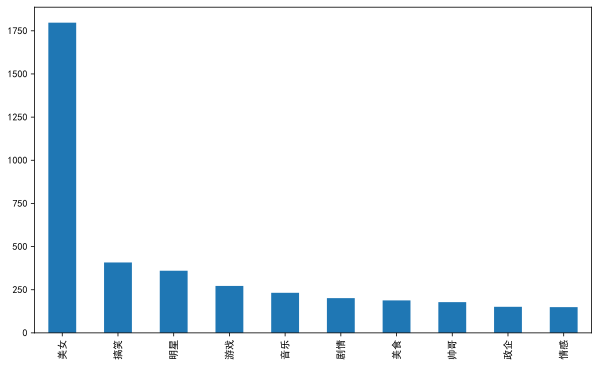

In [32]:
douyin['category'].value_counts()[:10].plot.bar(figsize=(10,6))
plt.show()

### 大V的粉丝数的分布 主要的粉丝量是多少

In [34]:
import seaborn as sns

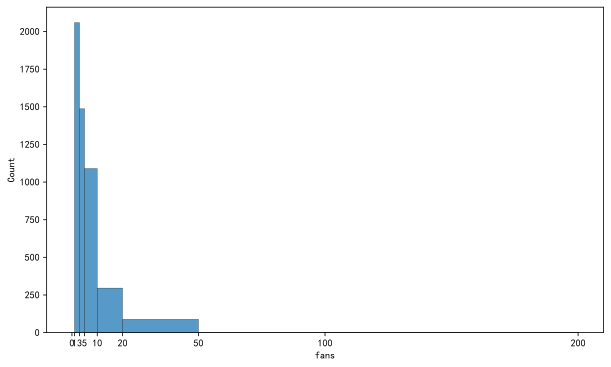

In [40]:
plt.figure(figsize=(10,6))
sns.histplot(x=douyin['fans']/1e6,bins=[0,1,3,5,10,20,50,100,200])
plt.xticks([0,1,3,5,10,20,50,100,200])
plt.show()

<AxesSubplot:>

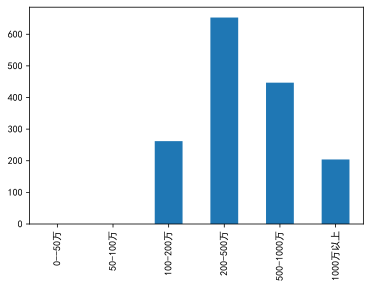

In [46]:
data = pd.cut(x=v.fans.values,bins=[0,500000,1000000,2000000,5000000,10000000,100000000],
              labels=['0--50万','50-100万','100-200万','200-500万','500-1000万','1000万以上'])
data.value_counts().plot.bar()


### 发布最多的视频的抖音账号是哪些?TOP10

In [55]:
videos = douyin.groupby('name')[['videos']].sum()
videos.sort_values('videos',ascending=False,inplace=True)


### 查看哪些大V获取的点赞数更多？

In [56]:
.sort_values(by="likes",ascending=False)[["name",'likes']].set_index("name")[:10].plot(kind="bar")

NameError: name 'v' is not defined

### 查看点赞数量的分布

array([<AxesSubplot:ylabel='likes'>], dtype=object)

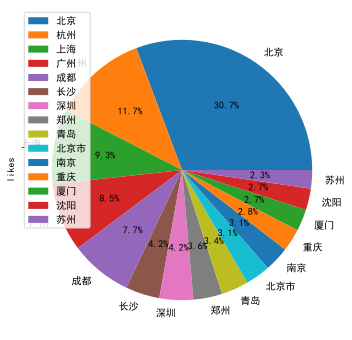

In [51]:
pd.pivot_table(df,
              index='city',
              values='likes',
              aggfunc='sum').nlargest(15,'likes').plot.pie(subplots=True,figsize=(6,6),autopct="%.1f%%")

### 查看评论、分享的分布

array([<AxesSubplot:ylabel='comments'>, <AxesSubplot:ylabel='shares'>],
      dtype=object)

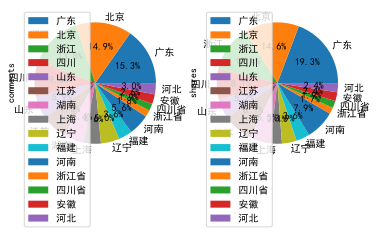

In [53]:
df.groupby('city')[['comments','shares']].sum()

pd.pivot_table(df,
              index='province',
              aggfunc='sum').nlargest(15,'fans')[['comments','shares']].plot.pie(subplots=True,figsize=(6,6),autopct="%.1f%%")

### 查看大V的毕业院校主要是哪些

array([<AxesSubplot:ylabel='fans'>], dtype=object)

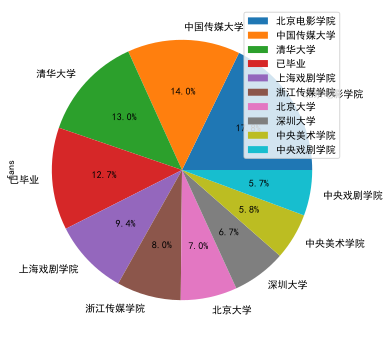

In [59]:
douyin.groupby('school').sum().nlargest(10,'fans')[['fans']].plot.pie(subplots=True,figsize=(6,6),autopct="%.1f%%")

<AxesSubplot:>

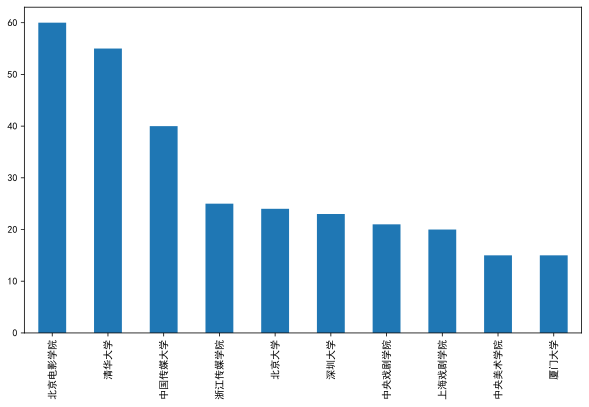

In [60]:
douyin[douyin['school']!='已毕业']['school'].value_counts()[:10].plot.bar(figsize=(10,6))